In [1]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Mounted at /content/drive


In [43]:
df = pd.read_csv('/content/drive/MyDrive/GOAI/Project/insurance/insurance.csv')

In [3]:
df_org = df

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<Axes: xlabel='sex', ylabel='count'>

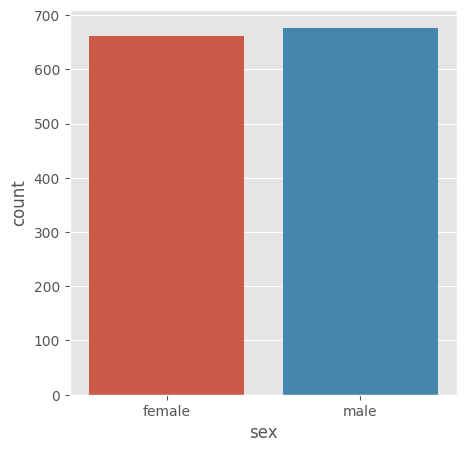

In [24]:
from matplotlib import style
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)

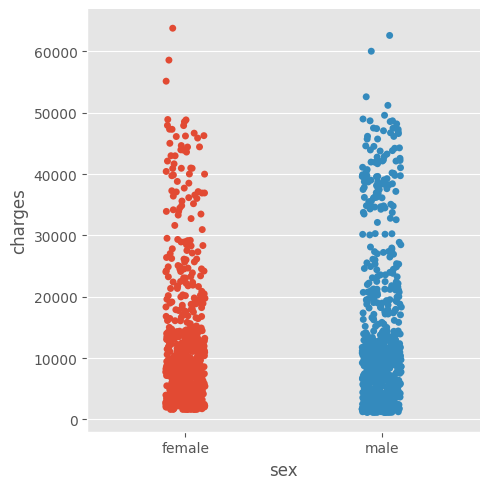

In [33]:
style.use('ggplot')
custom_palette = {'female': '#E24A33', 'male': '#348ABD'}
sns.catplot(x='sex', y='charges', data = df, palette=custom_palette)

<Axes: xlabel='smoker', ylabel='count'>

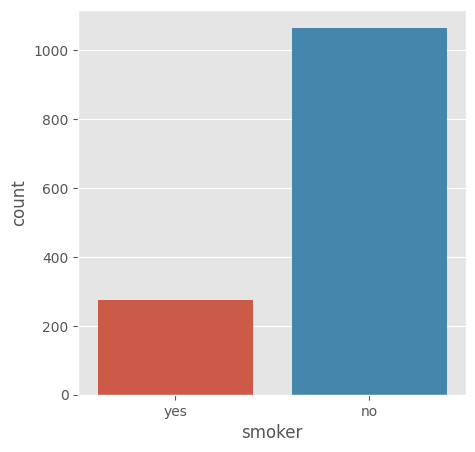

In [25]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='smoker', data=df)

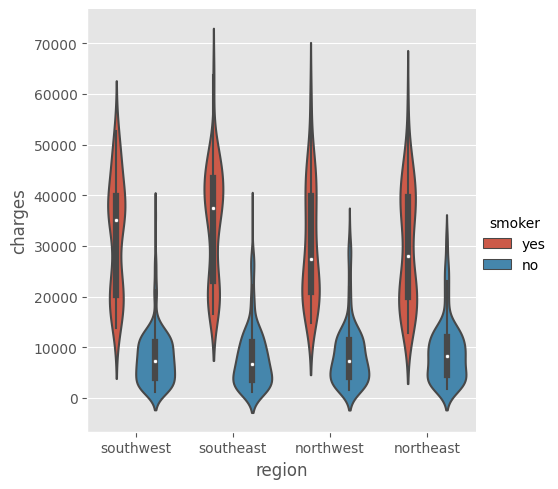

In [31]:
sns.catplot(x='region', y='charges', hue='smoker', kind='violin', data=df, legend=True)
style.use('ggplot')
plt.show()
#성별상관x

<Axes: xlabel='region', ylabel='count'>

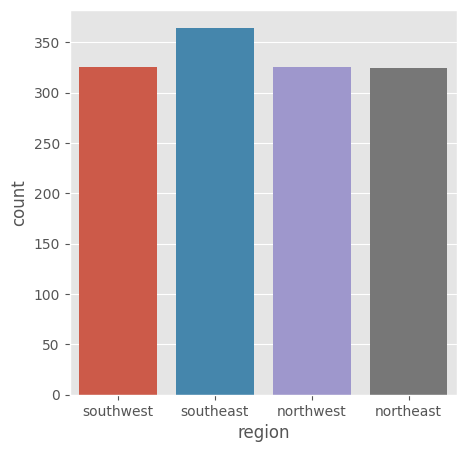

In [27]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='region', data=df)

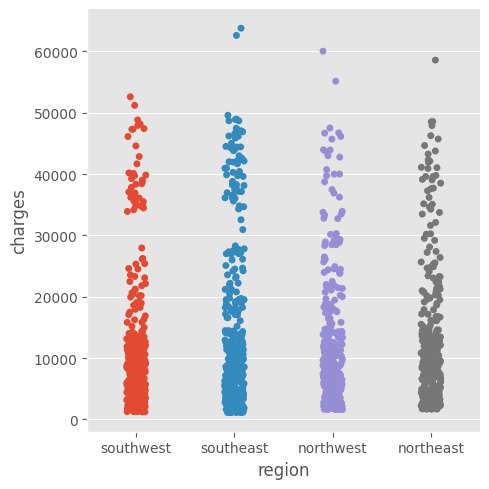

In [29]:
style.use('ggplot')

custom_palette = {'southwest': '#E24A33', 'southeast': '#348ABD', 'northwest':'#988ED5', 'northeast':'#777777'}

sns.catplot(x='region', y='charges', data = df, palette=custom_palette)

<Axes: xlabel='age', ylabel='Density'>

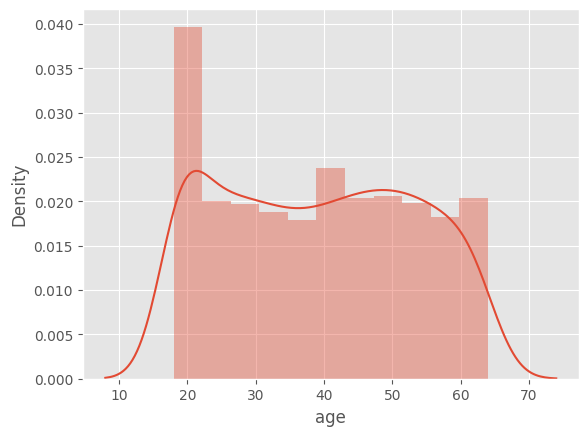

In [12]:
from matplotlib import style
style.use('ggplot')

sns.distplot(df['age'])

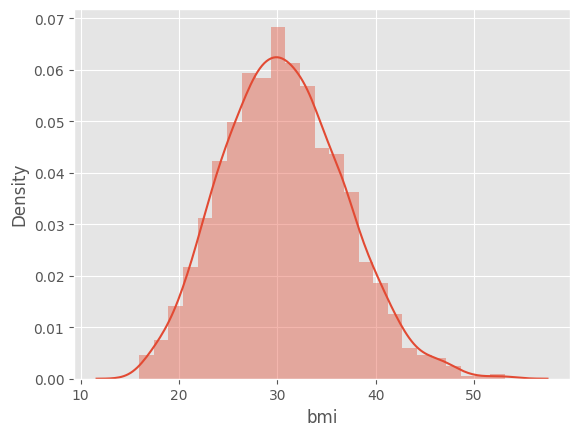

In [11]:
sns.distplot(df['bmi'])
style.use('ggplot')

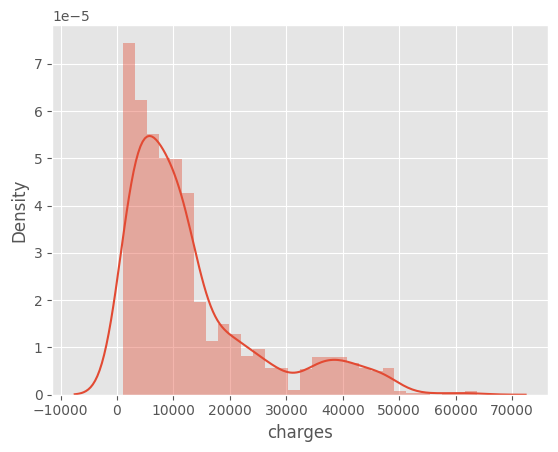

In [13]:
sns.distplot(df['charges'])
style.use('ggplot')

In [46]:
from sklearn.preprocessing import StandardScaler

features_scale = ['age', 'bmi', 'children']
df_features_scale = pd.DataFrame(df, columns=features_scale)
df_remaining_features = df.drop(columns=df_features_scale)

scaler = StandardScaler()
rescaled_features = scaler.fit_transform(df_features_scale)

df_rescalsed_feautures = pd.DataFrame(rescaled_features, columns=features_scale, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescalsed_feautures], axis=1)

In [44]:
df = pd.get_dummies(df, drop_first=True)

In [47]:
df.head()

,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,16884.92400,0,1,0,0,1,-1.438764,-0.453320,-0.908614
1,1725.55230,1,0,0,1,0,-1.509965,0.509621,-0.078767
2,4449.46200,1,0,0,1,0,-0.797954,0.383307,1.580926
3,21984.47061,1,0,1,0,0,-0.441948,-1.305531,-0.908614
4,3866.85520,1,0,1,0,0,-0.513149,-0.292556,-0.908614


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   charges           1338 non-null   float64
 1   age               1338 non-null   float64
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(4), uint8(5)
memory usage: 48.5 KB


In [42]:
corr = df.corr()
df.head()

,charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,16884.92400,-1.438764,-0.453320,-0.908614,0,1,0,0,1
1,1725.55230,-1.509965,0.509621,-0.078767,1,0,0,1,0
2,4449.46200,-0.797954,0.383307,1.580926,1,0,0,1,0
3,21984.47061,-0.441948,-1.305531,-0.908614,1,0,1,0,0
4,3866.85520,-0.513149,-0.292556,-0.908614,1,0,1,0,0


0.028400597907324365

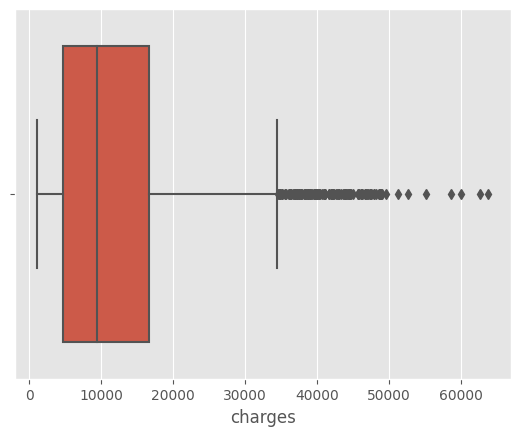

In [20]:
style.use('ggplot')
sns.boxplot(x = 'charges', data=df)
len(df.loc[df.charges>45000])/len(df)

# 45000이상은 3%

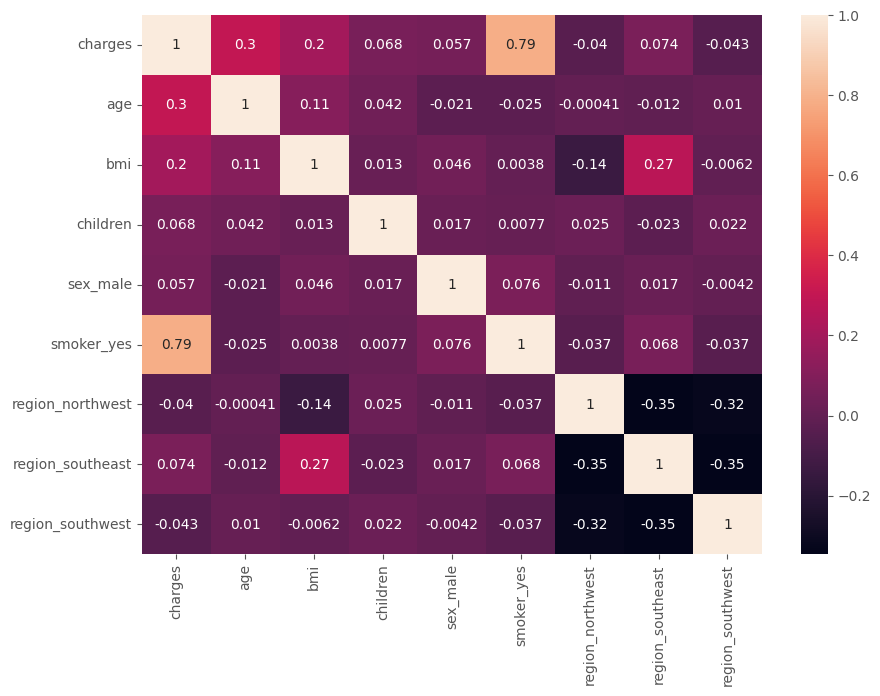

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cbar=True)
plt.show()

#smoker와 가장 상관

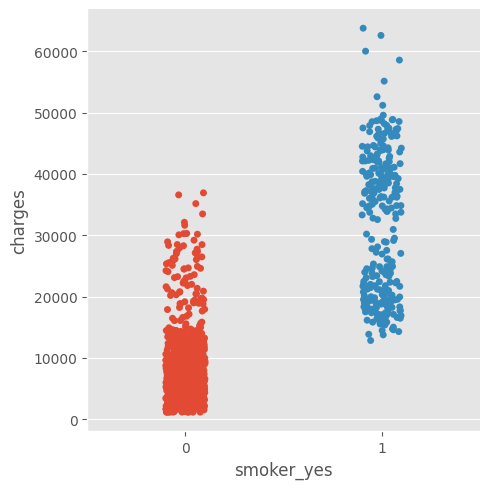

In [36]:
style.use('ggplot')
custom_palette = {'0': '#E24A33', '1': '#348ABD'}
sns.catplot(x='smoker_yes', y='charges', data = df, palette=custom_palette)

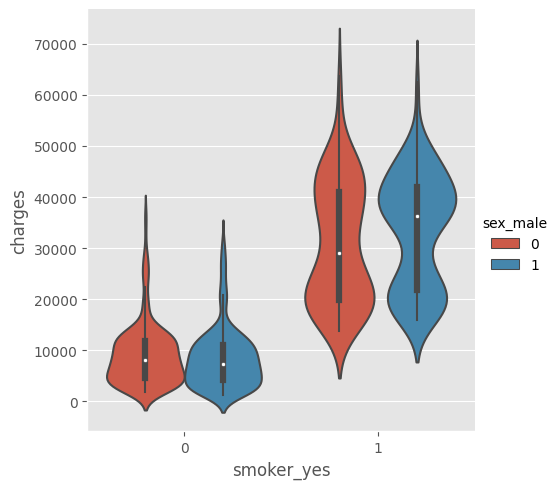

In [45]:
sns.catplot(x='smoker_yes', y='charges', hue='sex_male', kind='violin', data=df[df['age'] > 18], legend=True)
style.use('ggplot')
#성별상관x

* BMI지수

< 18.5: 저체중

18.5~22.9 : 정상

23 ~ 24.9: 과체중

25 ~ 29.9 : 경도비만

\>= 30 : 고도비만

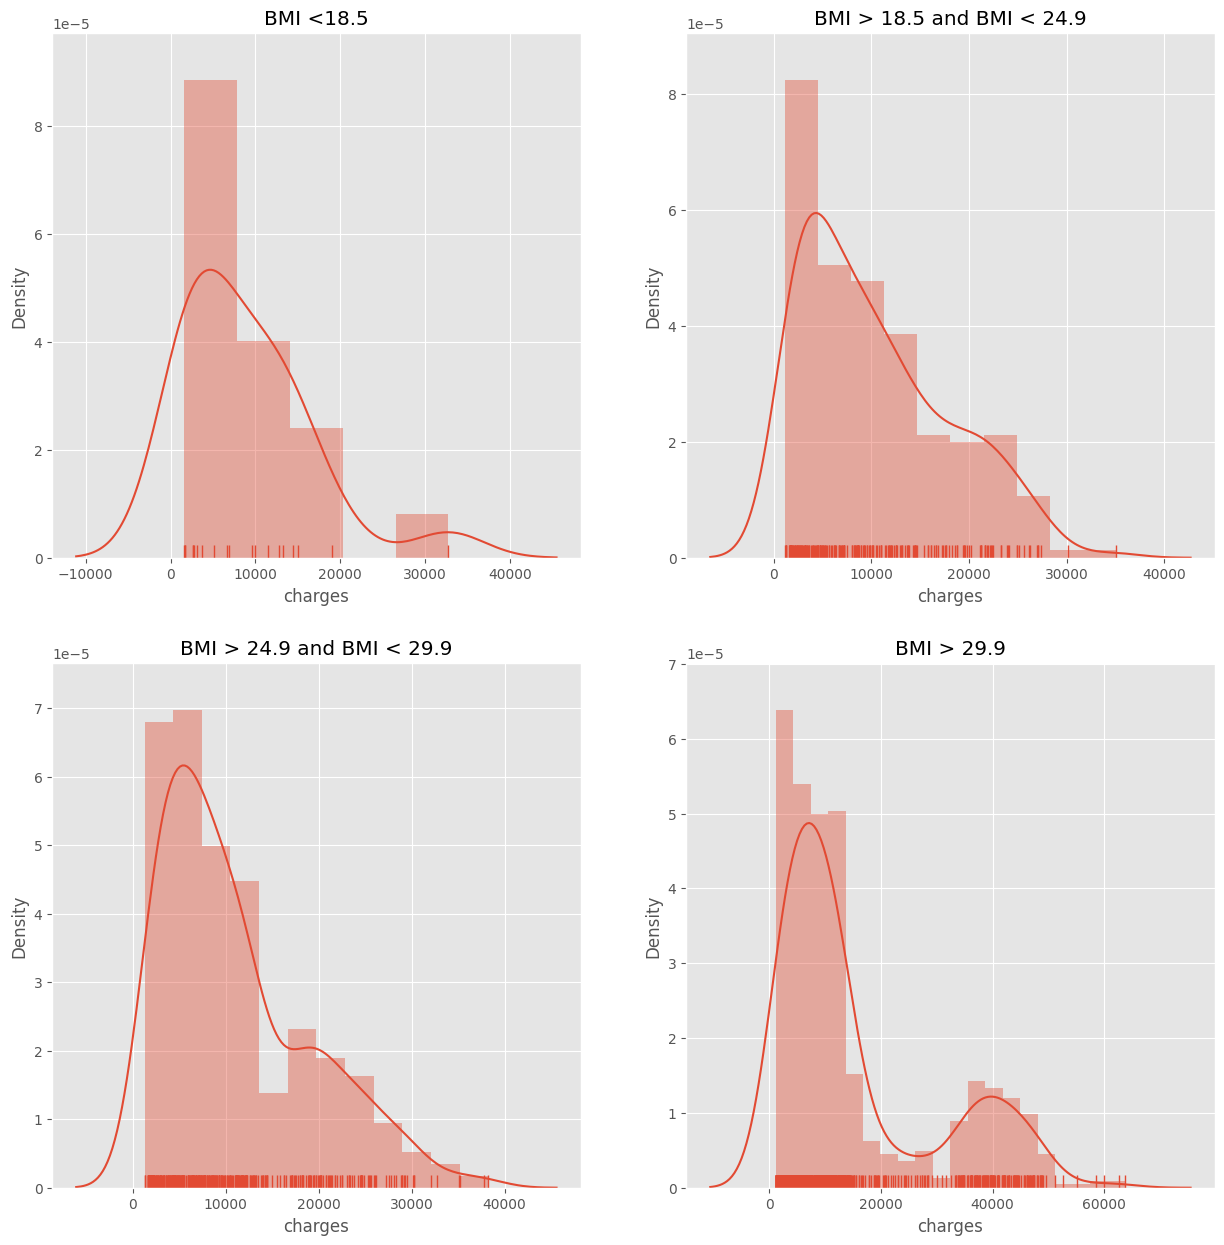

In [ ]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
ax = sns.distplot(df['charges'][df['bmi'] < 18.5], rug=True)
plt.title('BMI <18.5')



ax = fig.add_subplot(222)
ax = sns.distplot(df['charges'][(df['bmi'] >= 18.5) & (df['bmi'] < 24.9)], rug=True)
plt.title('BMI > 18.5 and BMI < 24.9')



ax = fig.add_subplot(223)
ax = sns.distplot(df['charges'][(df['bmi'] >= 24.9) & (df['bmi'] < 29.9)], rug=True)
plt.title('BMI > 24.9 and BMI < 29.9')


ax = fig.add_subplot(224)
ax = sns.distplot(df['charges'][df['bmi'] > 29.9], rug=True)
plt.title('BMI > 29.9')

style.use('ggplot')

plt.show()

#bmi 높을수록 점점,, 높아지는듯

<Axes: xlabel='bmi', ylabel='Density'>

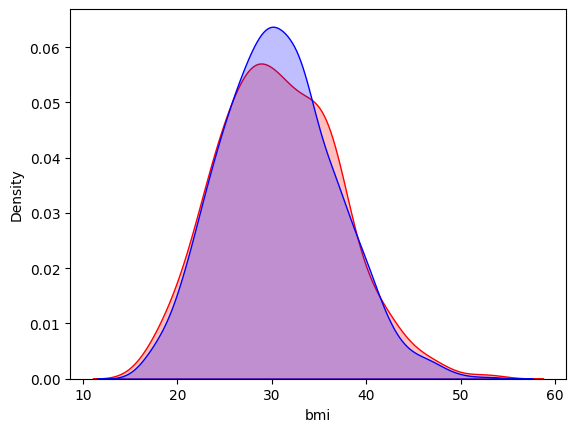

In [ ]:
sns.kdeplot(df.bmi[df['smoker_yes']== 1], color='Red', shade=True)
sns.kdeplot(df.bmi[df['smoker_yes']== 0], color='Blue', shade=True)

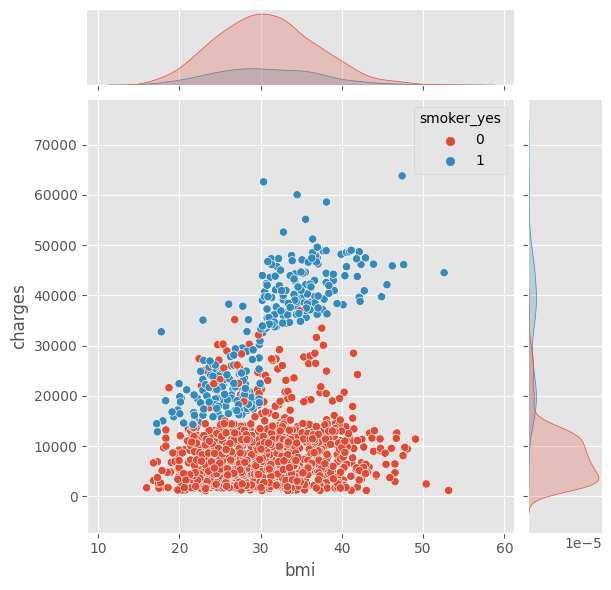

In [ ]:
sns.jointplot(x=df['bmi'], y=df['charges'] ,hue=df['smoker_yes'])
style.use('ggplot')

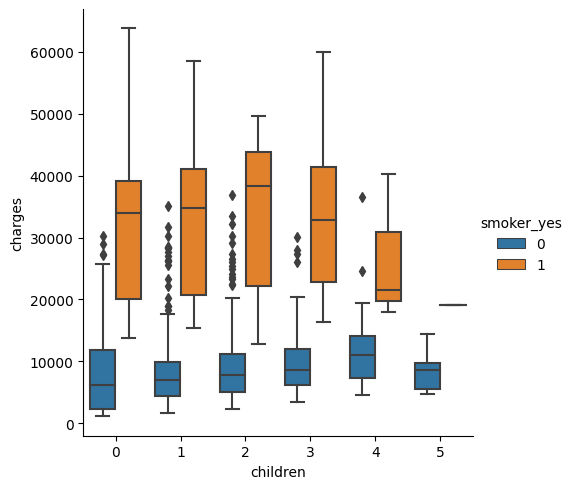

In [ ]:
sns.catplot(x='children', y='charges', hue='smoker_yes', kind='box', data=df)

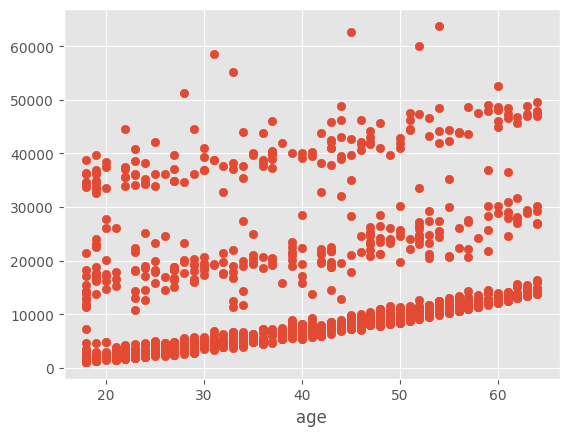

In [ ]:
style.use('ggplot')

plt.scatter(df['age'], df['charges'])
plt.xlabel('age')

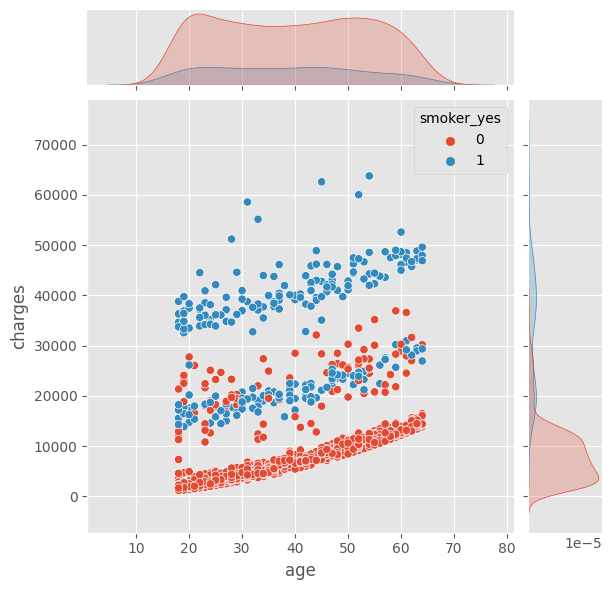

In [ ]:
sns.jointplot(x=df['age'], y=df['charges'] ,hue=df['smoker_yes'])
style.use('ggplot')
#나이가 들수록 요금 올라감

#담배로 나눠짐

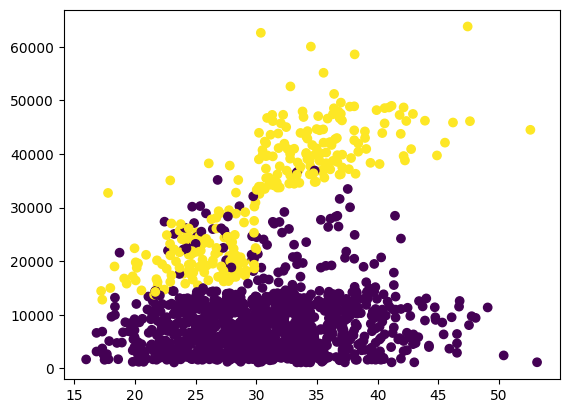

In [ ]:
plt.scatter(df['bmi'], df['charges'], c=df['smoker_yes'])

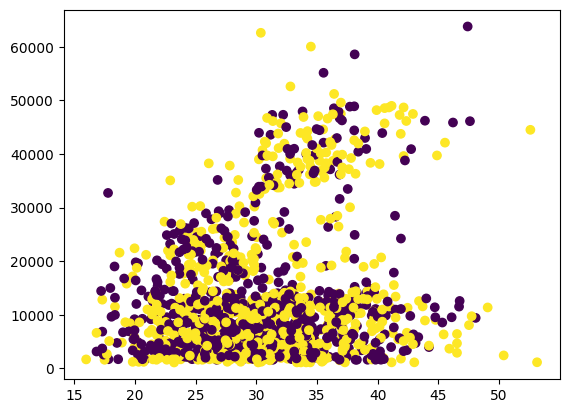

In [ ]:
plt.scatter(df['bmi'], df['charges'], c=df['sex_male'])